# Importation des modules

In [7]:
# Importation des modules
import pandas as pd
import pickle as pk
from PlotEval import evaluate_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

# Importation des variables globales
from config import (
    x_train_file,
    y_train_file,
    x_test_file,
    y_test_file,
    classifier_file,
    max_iter,
    class_weight,
    random_state,
    n_jobs
)

# Chargement du trainset et du testset

In [2]:
# Lecture des données d'entraînement
X, y = pd.read_csv(x_train_file), pd.read_csv(y_train_file)["win"]

# Lecture des données de test
x_test, y_test = pd.read_csv(x_test_file), pd.read_csv(y_test_file)["win"]

# Entraînement et test du classifier

Rapport de classification  :

              precision    recall  f1-score   support

          -1       0.65      0.65      0.65 4699.000000000166
           1       0.65      0.65      0.65    4699.0

    accuracy                           0.65 9398.000000000167
   macro avg       0.65      0.65      0.65 9398.000000000167
weighted avg       0.65      0.65      0.65 9398.000000000167



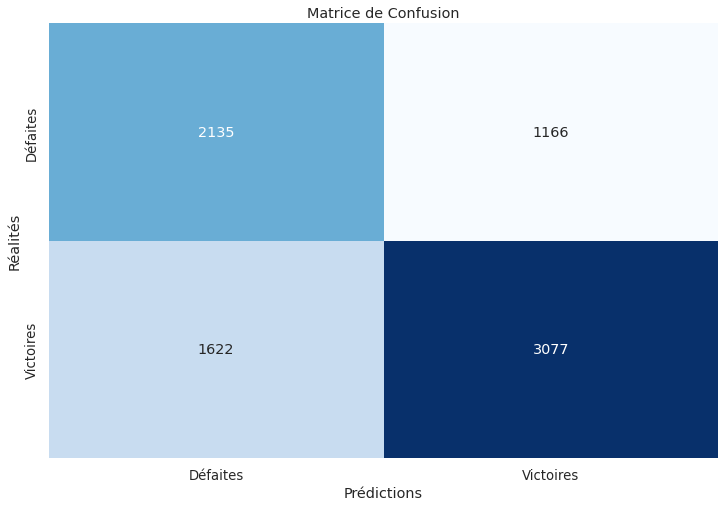

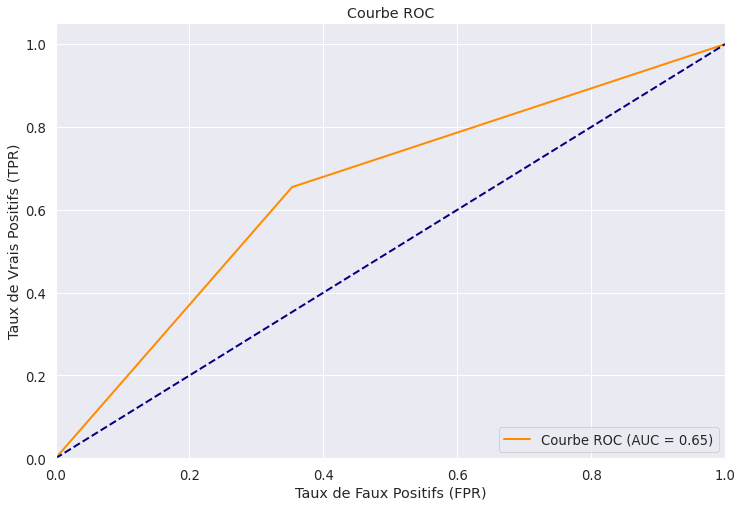

In [12]:
# Définition des paramètres du modèle de régression logistique
params = {"max_iter": max_iter, "class_weight": class_weight, "random_state": random_state, "n_jobs": n_jobs}

# Initialisation et entraînement du modèle de régression logistique avec les paramètres spécifiés
clf = LogisticRegression(**params).fit(X=X, y=y)

# Prédictions sur les données de test
y_pred = clf.predict(X=x_test)

# Évaluation de la classification en comparant les prédictions avec les étiquettes de classe réelles
evaluate_classification(y_true=y_test, y_pred=y_pred)

# Sauvegarde du classifier

Rapport de classification  :

              precision    recall  f1-score   support

          -1       0.65      0.65      0.65 14094.000000001439
           1       0.65      0.65      0.65   14094.0

    accuracy                           0.65 28188.00000000144
   macro avg       0.65      0.65      0.65 28188.00000000144
weighted avg       0.65      0.65      0.65 28188.00000000144



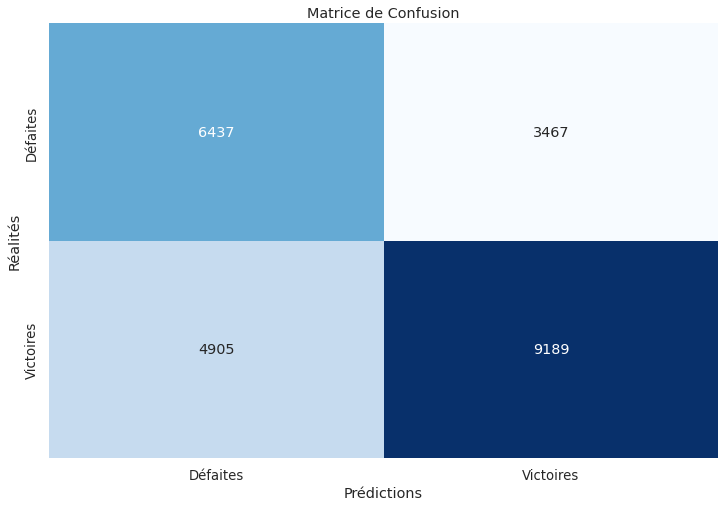

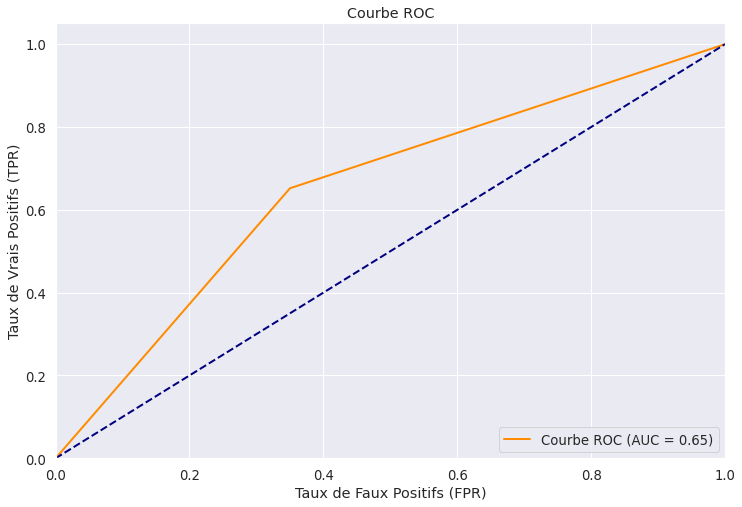

In [4]:
# Concaténation des données d'entraînement et de test pour créer des ensembles complets de caractéristiques et de cibles
features, target = pd.concat(objs=[X, x_test], axis=0), pd.concat(objs=[y, y_test], axis=0)

# Initialisation et entraînement du modèle de régression logistique avec les paramètres spécifiés
clf = LogisticRegression(**params).fit(X=features, y=target)

# Prédictions sur l'ensemble combiné des données d'entraînement et de test
y_pred = clf.predict(X=features)

# Évaluation de la classification sur l'ensemble combiné des données d'entraînement et de test
evaluate_classification(y_true=target, y_pred=y_pred)

# Sauvegarde du modèle entraîné dans un fichier à l'aide de pickle
with open(file=classifier_file, mode="wb") as file:
    pk.dump(obj=clf, file=file)